In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [145]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [146]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [147]:
print('Data shape =>',df.shape)

Data shape => (5572, 5)


In [148]:
# Remove Unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
# Rename the columns
df.rename(columns={'v1':'label','v2':'messages'},inplace=True)

In [149]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
# value counts of ham and spam
print('label counts \n',df.label.value_counts())

label counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [151]:
# check ratio of ham and spam 
print('spam ration = ',round(len(df[df['label']=='spam'])/ len(df.label),2)*100,'%')
print('ham ratio = ',round(len(df[df['label']== 'ham'])/len(df.label),2)*100,'%')

spam ration =  13.0 %
ham ratio =  87.0 %


In [152]:
# measure total len of string on message
df['length']=df.messages.str.len()
df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [153]:
# Convert label to one hot encoder 
df['label'].replace({'ham':0,'spam':1},inplace=True)

In [154]:
df.head()

,label,messages,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [155]:
# convert all words to lower cases
df['messages']=df['messages'].str.lower()

In [156]:
df.head()

,label,messages,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [157]:
# Remove Regular expression
# replace email by emailaddress
df['messages']=df['messages'].str.replace(r'^.+@[^\.].*\.[a-z]{2,3}$','emailaddress')

# replace url by webaddress
df['messages']=df['messages'].str.replace(r'^http:\//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

# replace moneysymbol by moneysym(£ type ALT+ 156, ¥ => ALT + 157)
df['messages']=df['messages'].str.replace(r'£|\$\¥','dollar')

# 10 digits no. replace by phone num
df['messages']=df['messages'].str.replace(r'^\([\d]{3}\)?[\s-]?[\d]{3}[s\-]?[\d]{4}$','phonenumber')

# replace numbers with numbr
df['messages']=df['messages'].str.replace(r'\d+(\.\d+)?','numbr')

In [158]:
df

,label,messages,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,this is the numbrnd time we have tried numbr c...,161
5568,0,will ì_ b going to esplanade fr home?,37
5569,0,"pity, * was in mood for that. so...any other s...",57
5570,0,the guy did some bitching but i acted like i'd...,125


In [197]:
# Remove punchuation
df['messages']=df['messages'].str.replace(r'[^\w\d\s\+*w_w?]',' ')

# remove whitespaces bysingle space
df['messages']=df['messages'].str.replace(r'\s+',' ')

# Remove Leading and taling space
df['messages']=df['messages'].str.replace(r'^\s+|\s+?$',' ')

In [198]:
df

,label,messages,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38
...,...,...,...,...
5567,1,numbrnd time tried numbr contact ådollarnumbr ...,161,129
5568,0,ì_ b going esplanade fr home,37,28
5569,0,pity mood suggestions,57,21
5570,0,guy bitching acted like interested buying some...,125,79


In [161]:
import nltk
import string
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','urs'])
df['messages']=df['messages'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [162]:
 df

,label,messages,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif oni,29
2,1,free entry numbr wkly comp win fa cup final tk...,155
3,0,dun say early hor c already say,49
4,0,nah think goes usf lives around though,61
...,...,...,...
5567,1,numbrnd time tried numbr contact ådollarnumbr ...,161
5568,0,ì_ b going esplanade fr home,37
5569,0,pity mood suggestions,57
5570,0,guy bitching acted like interested buying some...,125


In [163]:
# clean text data length
df['clean_length']=df.messages.str.len()
df

,label,messages,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38
...,...,...,...,...
5567,1,numbrnd time tried numbr contact ådollarnumbr ...,161,129
5568,0,ì_ b going esplanade fr home,37,28
5569,0,pity mood suggestions,57,21
5570,0,guy bitching acted like interested buying some...,125,79


In [164]:
print('orignal len: ',df.length.sum())
print('clean len: ',df.clean_length.sum())

orignal len:  446422
clean len:  300254


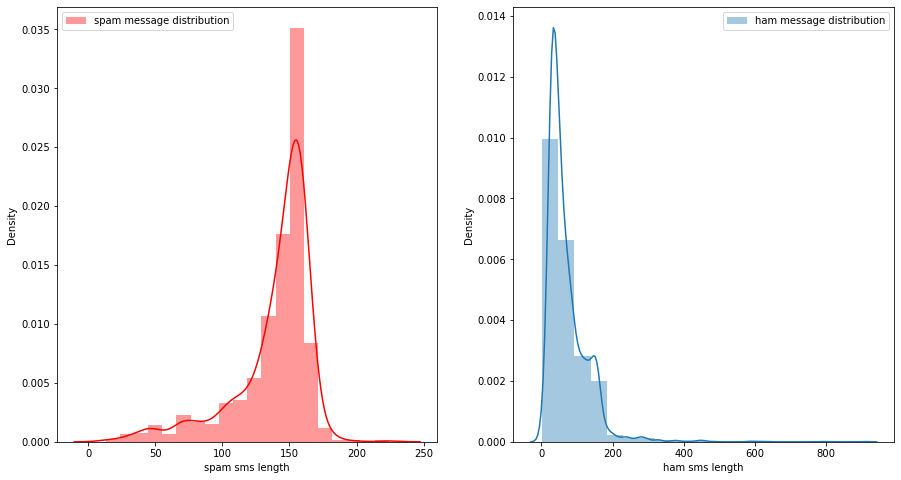

In [165]:
f,ax= plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label=['spam message distribution'],color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label=['ham message distribution'])
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

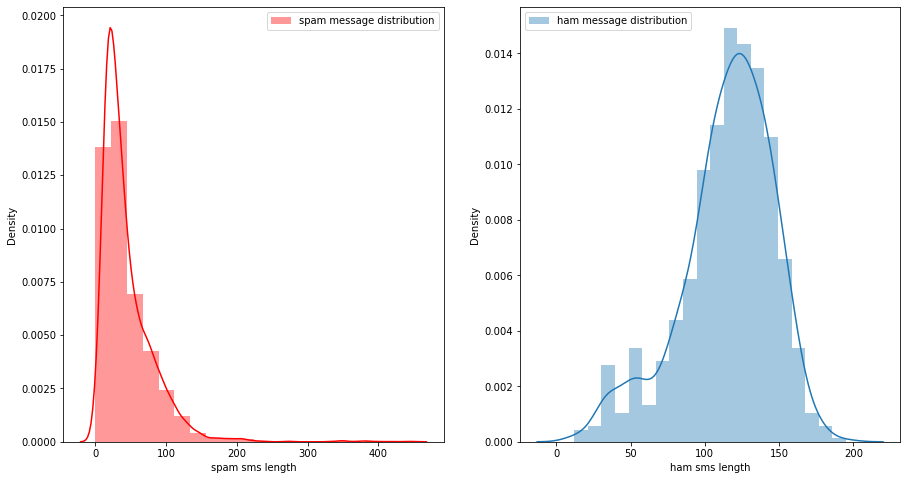

In [166]:
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[0],label=['spam message distribution'],color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[1],label=['ham message distribution'])
ax[1].set_xlabel('ham sms length')
ax[1].legend()

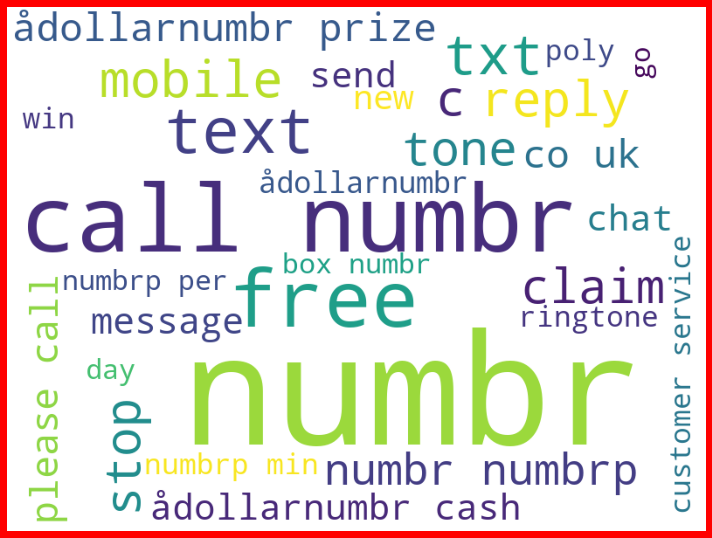

In [167]:
# generate wordcloud
from wordcloud import WordCloud

spam=df['messages'][df['label']==1]
spam_cloud=WordCloud(width=800,height=600,background_color='white',max_words=30).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

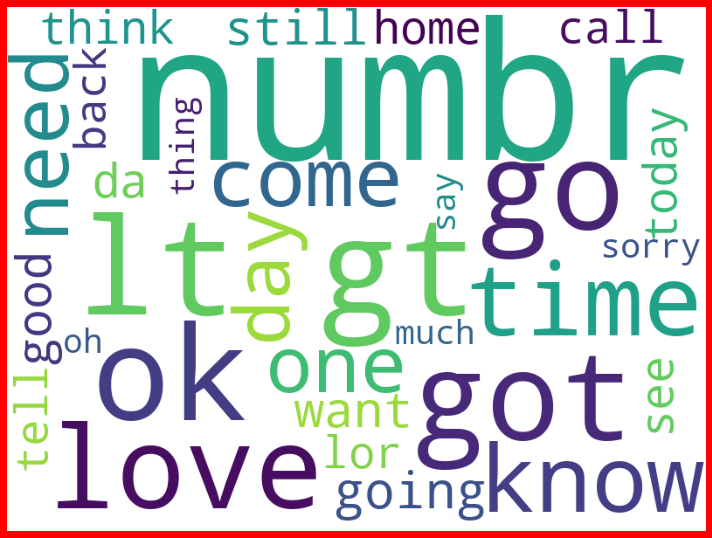

In [170]:
ham=df['messages'][df['label']==0]
ham_cloud=WordCloud(width=800,height=600,background_color='white',max_words=30).generate(' '.join(ham))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [175]:
# convert word to vector bt tf-idf
# use navie bayes classifiers
# split train and test

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [177]:
tfd=TfidfVectorizer()
naive=MultinomialNB()
features=tfd.fit_transform(df['messages'])
x=features
y=df['label']

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
print('accuracy score =>\n',accuracy_score(y_test,y_pred))

accuracy score =>
 0.9698492462311558


In [185]:
print('Classification report =>\n',classification_report(y_test,y_pred))
print('confusion matrix =>\n',confusion_matrix(y_test,y_pred))

Classification report =>
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.78      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

confusion matrix =>
 [[1202    0]
 [  42  149]]


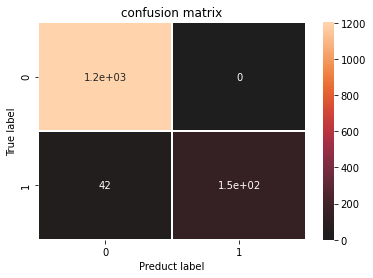

In [188]:
conf_matx=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matx,annot=True,linewidth=.5,linecolor='white',center=0)
plt.xlabel('Preduct label')
plt.ylabel('True label')
plt.title('confusion matrix')
plt.show()